# Generating the graph for a single subreddit

This notebook contains code from the 'Phase1_Network_Graph.ipynb' notebook, but it considers only a single subreddit and generates the graphs.

# **the code is up to date**

these sections can be ignored<br>
1. Clean up data <br>
2. Generate Graph for Method 1 <br>

---
Reading the data
---


.

In [ ]:
import torch
if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device('cpu')
print("Using {}.".format(device_name))

Using cuda.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import io
data = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/reddit_comments_2017_01_01-02.json')

In [ ]:
print(len(data)) #length of data = 4217070
print(len(pd.unique(data['subreddit_id']))) #number of subreddits considered = 25779
print(len(pd.unique(data['id']))) #unique number of comments = 4217070, the data is at the comment level
print(len(pd.unique(data['parent_id']))) #number of parent nodes = 2204623
print(len(pd.unique(data['link_id']))) #number of submissions = 456163

4217070
25779
4217070
2204623
456163


In [ ]:
#data_subreddit_t5_22i0=data[data['link_id']=='t3_5lbzj0'] #just giving this subset the same name as a subreddit so that I do not have to change code
data_subreddit_t5_22i0 = data[data['subreddit_id'] == "t5_22i0"]

save dataframe of 1 subreddit to csv

In [ ]:
data_subreddit_t5_22i0.to_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_subreddit_t5_22i0.csv')

In [ ]:
import pandas as pd
data_subreddit_t5_22i0 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_subreddit_t5_22i0.csv', index_col=[0])
print(len(data_subreddit_t5_22i0)) #length of data = 6142
print(len(pd.unique(data_subreddit_t5_22i0['subreddit_id']))) #number of subreddits considered = 1
print(len(pd.unique(data_subreddit_t5_22i0['id']))) #unique number of comments =  6142, the data is at the comment level
print(len(pd.unique(data_subreddit_t5_22i0['parent_id']))) #number of parent nodes = 3501
print(len(pd.unique(data_subreddit_t5_22i0['link_id']))) #number of submissions = 253

6142
1
6142
3501
253


save dataframe of 1 submission to csv

In [ ]:
data_submission_t3_5lbzj0=data[data['link_id']=='t3_5lbzj0']
data_submission_t3_5lbzj0.to_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_submission_t3_5lbzj0.csv')
data_submission_t3_5lbzj0 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_submission_t3_5lbzj0.csv')
print(len(data_submission_t3_5lbzj0)) #length of data = 12
print(len(pd.unique(data_submission_t3_5lbzj0['subreddit_id']))) #number of subreddits considered = 1
print(len(pd.unique(data_submission_t3_5lbzj0['id']))) #unique number of comments = , the data is at the comment level = 12
print(len(pd.unique(data_submission_t3_5lbzj0['parent_id']))) #number of parent nodes = 4
print(len(pd.unique(data_submission_t3_5lbzj0['link_id']))) #number of submissions = 1

12
1
12
4
1


In [ ]:
print(len(data_subreddit_t5_22i0['link_id'].unique())) # unqiue submission considered
print(data_subreddit_t5_22i0['link_id'].unique())
print(len(data_subreddit_t5_22i0))
print(data_subreddit_t5_22i0['author'].unique()) #authors in this submission including authors who made the post itself

253
['t3_5lc6zb' 't3_5lca7i' 't3_5lbr04' 't3_5lcd9r' 't3_5lcet3' 't3_5l8vmf'
 't3_5lc4rw' 't3_5lcf3y' 't3_5lbzj0' 't3_5l94lc' 't3_5l9bh8' 't3_5lcbso'
 't3_5lbjbv' 't3_5lc1ln' 't3_5laq4s' 't3_5l6jet' 't3_5l9v4n' 't3_5lcj4o'
 't3_5l8ur9' 't3_5lc6si' 't3_5l96wy' 't3_5la58w' 't3_5lal7e' 't3_5lclrj'
 't3_5l4gx4' 't3_5l9mca' 't3_5lcfqp' 't3_5lbfmb' 't3_5l2mto' 't3_5l9c5i'
 't3_5l9jdq' 't3_5lci2m' 't3_5l9vnz' 't3_5lcsil' 't3_5lcs5p' 't3_5lcwqi'
 't3_5l4osw' 't3_5l9x2i' 't3_5l9xi1' 't3_5kxw3h' 't3_5kfjik' 't3_5l8so8'
 't3_5l9b87' 't3_5ldduw' 't3_5ldslk' 't3_5l992c' 't3_5la917' 't3_5l4skh'
 't3_5lcd0q' 't3_5l8ant' 't3_5lej9a' 't3_5lekbu' 't3_5lelng' 't3_5len7w'
 't3_5lemp5' 't3_5leoem' 't3_5lenzg' 't3_5leqqn' 't3_5ld559' 't3_5kwe9i'
 't3_5let50' 't3_5ler47' 't3_5lertn' 't3_5l9mk9' 't3_5leqpm' 't3_5l9gtc'
 't3_5leqwl' 't3_5lewdj' 't3_5leww0' 't3_5l8nka' 't3_5lebpu' 't3_5lezuv'
 't3_5la8ot' 't3_5lem78' 't3_5lexsd' 't3_5lf21z' 't3_5l9mce' 't3_5leeju'
 't3_5lf4ng' 't3_5lf5bc' 't3_5lf26h' 't3_5l90oc

In [ ]:
data_subreddit_t5_22i0.head(3)

,edited,id,parent_id,distinguished,created_utc,author_flair_text,author_flair_css_class,controversiality,subreddit_id,retrieved_on,link_id,author,score,gilded,stickied,body,subreddit
0,0,dbumnpz,t1_dbulzrw,NaN,1483228800,NaN,NYAN,0,t5_22i0,1485679711,t3_5lc6zb,captnkaposzta,2,0,False,Beileid? Kiwi Fernsehgarten Trinkspiele retten...,de
117,0,dbumnt9,t1_dbumgyw,NaN,1483228803,Hamburg,HAMB,0,t5_22i0,1485679712,t3_5lca7i,TikeRike,4,0,False,Glückwunsch zum Geburtstag!,de
338,0,dbumnzf,t1_dbul14e,NaN,1483228811,Freiburg,FREIBU,0,t5_22i0,1485679714,t3_5lbr04,oldandgreat,1,0,False,"Dieser Sesamstraßen Frosch war hip auf Bpt, do...",de


---
Clean up data
---

I was trying out some stuff here- to experiment between primary and secondary comments. No need to execute this section.


goal is to do two things- <br>
1. remove primary comments as they will not tell us about the interaction between two users under the submission, and <br>
2. to clean up all those comments for which there exists no parents <br>
.

In [ ]:
def clean_up_data(input_data):

  #remove all the primary comments
  removed_primary_comments = input_data[input_data['parent_id'] != input_data['link_id']]

  #remove all the rows for which no valid parent comment exists
  flag = []
  for index, row in removed_primary_comments.iterrows():
      curr_parent_comment_id = row['parent_id'][3:]
      print(curr_parent_comment_id)
      if(len(removed_primary_comments[removed_primary_comments['id'] == curr_parent_comment_id]) == 0): #the parent comment could not be found
        print('here')
        flag.append(1) #setting a default value to mark this comment as invalid
      else:
        flag.append(0)

  #add the flag as a new column
  removed_primary_comments['flagged'] = flag
  removed_invalid_comments = removed_primary_comments[removed_primary_comments['flagged'] != 1]
  removed_invalid_comments.drop(removed_invalid_comments.filter(regex="Unname"),axis=1, inplace=True)

  return removed_invalid_comments


In [ ]:
#before clean up
print(len(data_submission_t3_5lbzj0)) #length of data = 12
print(len(pd.unique(data_submission_t3_5lbzj0['subreddit_id']))) #number of subreddits considered = 1
print(len(pd.unique(data_submission_t3_5lbzj0['id']))) #unique number of comments = , the data is at the comment level = 12
print(len(pd.unique(data_submission_t3_5lbzj0['parent_id']))) #number of parent nodes = 4
print(len(pd.unique(data_submission_t3_5lbzj0['link_id']))) #number of submissions = 1
print('********')
#test function
test1 = clean_up_data(data_submission_t3_5lbzj0)
print(len(test1)) #length of data = 4
print(len(pd.unique(test1['subreddit_id']))) #number of subreddits considered = 1
print(len(pd.unique(test1['id']))) #unique number of comments = , the data is at the comment level = 4
print(len(pd.unique(test1['parent_id']))) #number of parent nodes = 3
print(len(pd.unique(test1['link_id']))) #number of submissions = 1

12
1
12
4
1
********
dbuiogs
here
dbul82z
here
dbupywv
dbupywv
2
1
2
1
1


<ipython-input-54-3d689a42d844>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_primary_comments['flagged'] = flag
<ipython-input-54-3d689a42d844>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_invalid_comments.drop(removed_invalid_comments.filter(regex="Unname"),axis=1, inplace=True)


check the original data

In [ ]:
data_submission_t3_5lbzj0

,Unnamed: 0,edited,id,parent_id,distinguished,created_utc,author_flair_text,author_flair_css_class,controversiality,subreddit_id,retrieved_on,link_id,author,score,gilded,stickied,body,subreddit
0,7955,0,dbumtxv,t3_5lbzj0,NaN,1483229087,NaN,NaN,0,t5_22i0,1485679794,t3_5lbzj0,[deleted],1,0,False,[deleted],de
1,153109,0,dbupywv,t1_dbuiogs,NaN,1483234150,Bayern,BAVA,0,t5_22i0,1485681522,t3_5lbzj0,Madjura,5,0,False,&gt;Clown\n\n[Bitte auch richtig aussprechen!]...,de
2,533324,0,dbuy767,t3_5lbzj0,NaN,1483249885,Nämberch,NUERN,0,t5_22i0,1485685479,t3_5lbzj0,bkifft,2,0,False,"Altes Material ist alt: QI Staffel 2 Folge 8 ""...",de
3,616845,0,dbv005l,t3_5lbzj0,NaN,1483254268,NaN,NaN,0,t5_22i0,1485686348,t3_5lbzj0,farEast11,1,0,False,Bumerang,de
4,702648,0,dbv1uyi,t1_dbul82z,NaN,1483259676,NaN,NaN,0,t5_22i0,1485687237,t3_5lbzj0,Seventh_Planet,1,0,False,"Wer die Wahrheit sagt, braucht ein schnelles P...",de
5,758119,0,dbv323c,t3_5lbzj0,NaN,1483263883,NaN,NaN,0,t5_22i0,1485687812,t3_5lbzj0,upsetbob,3,0,False,Wie nennt man ein helles Mammut?\n\n\nHelmut,de
6,758963,0,dbv32r4,t3_5lbzj0,NaN,1483263952,NaN,NaN,0,t5_22i0,1485687822,t3_5lbzj0,upsetbob,4,0,False,Welcher Fisch furzt einen halben Ton tiefer?\n...,de
7,770217,0,dbv3bjm,t3_5lbzj0,NaN,1483264868,Sauerland,TEXT,0,t5_22i0,1485687939,t3_5lbzj0,Alcatruzt,5,0,False,"Kommt ein Pferd in einen Blumenladen: ""Ham se ...",de
8,772264,0,dbv3d52,t3_5lbzj0,NaN,1483265044,Sauerland,TEXT,0,t5_22i0,1485687960,t3_5lbzj0,Alcatruzt,2,0,False,"Kommt ein Luftballon zum Arzt: ""Herr Doktor, i...",de
9,920500,0,dbv6kfu,t1_dbupywv,NaN,1483277448,NaN,NaN,0,t5_22i0,1485689497,t3_5lbzj0,[deleted],1,0,False,[deleted],de


check the cleaned up data

In [ ]:
test1

,edited,id,parent_id,distinguished,created_utc,author_flair_text,author_flair_css_class,controversiality,subreddit_id,retrieved_on,link_id,author,score,gilded,stickied,body,subreddit,flagged
9,0,dbv6kfu,t1_dbupywv,NaN,1483277448,NaN,NaN,0,t5_22i0,1485689497,t3_5lbzj0,[deleted],1,0,False,[deleted],de,0
11,0,dbwe9uj,t1_dbupywv,NaN,1483352296,NaN,NaN,0,t5_22i0,1485711522,t3_5lbzj0,keylu,2,0,False,"""Zöakos"" statt ""Zirkus"" ist ja fast noch schli...",de,0


---
Generate Graph for 1 submission using Method 1
---


.

In [ ]:
data_method1 = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','edgeweight_method1'])
print(data_method1)

Empty DataFrame
Columns: [subreddit_id, submission_id, from_user, to_user, edgeweight_method1]
Index: []


In [ ]:
def method1_function(subreddit_id, subreddit_data):
  #obtain the link_id's of all submission in the subreddit
  submissions_list = subreddit_data['link_id'].unique()
  #obtain the names of all user's in the subreddit
  #author_list = subreddit_data['author'].unique()
  #print(author_list[0])
  #print(author_list[1])

  print("Consider subreddit with ID: ",subreddit_id)
  print("total number of submission: ",len(submissions_list))
  counter = 0

  for i in submissions_list:
    print('\n***********************')
    counter += 1
    curr_link_id = i
    print("consider submission with link_id = "+str(curr_link_id)+ " ("+str(counter)+"/"+str(len(submissions_list))+")")

    #obtain all comments made on this submission from the subreddit
    submission_comments = subreddit_data.loc[subreddit_data['link_id'] == curr_link_id]
    #print(submission_comments.head(3))

    #obtain the names of all user's in the subsmission
    author_list = submission_comments['author'].unique()
    print("total number of authors: ",len(author_list))

    #number of comments on the subreddit
    tot_comments = len(submission_comments)
    print("total number of comments in this submission = ", tot_comments)

    for ind, j in enumerate(author_list):
      curr_author = j
      #print("checking comments made by user = ", curr_author)
      #this author is connected to all other authors who also made comments on this submission
      for k in range(ind+1, len(author_list)):
        next_author = author_list[k]
        #print("next author -> ", next_author)

        #the edge between any two users is the total number of interactions they both made on the post / total number of comments on the post
        curr_author_comment_number = submission_comments['author'].value_counts()[curr_author]
        next_author_comment_number = submission_comments['author'].value_counts()[next_author]
        #print(curr_author_comment_number, next_author_comment_number)

        weighted_interaction_between_curr_and_next_author = float("{:.2f}".format((curr_author_comment_number + next_author_comment_number)/tot_comments))

        #add the row to the dataframe
        data_method1.loc[len(data_method1.index)] = [subreddit_id, curr_link_id, curr_author, next_author, weighted_interaction_between_curr_and_next_author]
        #print("added row to data frame")

  return data_method1

data_method1 = method1_function('t5_22i0',data_subreddit_t5_22i0)

Consider subreddit with ID:  t5_22i0
total number of submission:  1

***********************
consider submission with link_id = t3_5lbzj0 (1/1)
total number of authors:  9
total number of comments in this submission =  12


In [ ]:
print(len(data_method1))
print(data_method1.head(140))

36
   subreddit_id submission_id       from_user         to_user  \
0       t5_22i0     t3_5lbzj0       [deleted]         Madjura   
1       t5_22i0     t3_5lbzj0       [deleted]          bkifft   
2       t5_22i0     t3_5lbzj0       [deleted]       farEast11   
3       t5_22i0     t3_5lbzj0       [deleted]  Seventh_Planet   
4       t5_22i0     t3_5lbzj0       [deleted]        upsetbob   
5       t5_22i0     t3_5lbzj0       [deleted]       Alcatruzt   
6       t5_22i0     t3_5lbzj0       [deleted]    Johannesboy1   
7       t5_22i0     t3_5lbzj0       [deleted]           keylu   
8       t5_22i0     t3_5lbzj0         Madjura          bkifft   
9       t5_22i0     t3_5lbzj0         Madjura       farEast11   
10      t5_22i0     t3_5lbzj0         Madjura  Seventh_Planet   
11      t5_22i0     t3_5lbzj0         Madjura        upsetbob   
12      t5_22i0     t3_5lbzj0         Madjura       Alcatruzt   
13      t5_22i0     t3_5lbzj0         Madjura    Johannesboy1   
14      t5_22i0     t3

In [ ]:
data_method1_final = pd.DataFrame(columns=['from_user','to_user','edgeweight_method1'])
print(data_method1_final)

Empty DataFrame
Columns: [from_user, to_user, edgeweight_method1]
Index: []


In [ ]:
data_method1_final = data_method1.groupby(['from_user', 'to_user'], as_index=False)['edgeweight_method1'].mean()

In [ ]:
print(len(data_method1_final))
print(data_method1_final.columns)
print(data_method1_final.head(140))

36
Index(['from_user', 'to_user', 'edgeweight_method1'], dtype='object')
         from_user         to_user  edgeweight_method1
0        Alcatruzt    Johannesboy1                0.25
1        Alcatruzt           keylu                0.25
2     Johannesboy1           keylu                0.17
3          Madjura       Alcatruzt                0.25
4          Madjura    Johannesboy1                0.17
5          Madjura  Seventh_Planet                0.17
6          Madjura          bkifft                0.17
7          Madjura       farEast11                0.17
8          Madjura           keylu                0.17
9          Madjura        upsetbob                0.25
10  Seventh_Planet       Alcatruzt                0.25
11  Seventh_Planet    Johannesboy1                0.17
12  Seventh_Planet           keylu                0.17
13  Seventh_Planet        upsetbob                0.25
14       [deleted]       Alcatruzt                0.33
15       [deleted]    Johannesboy1             

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
G_method1 = nx.from_pandas_edgelist(data_method1_final, "from_user", "to_user", edge_attr="edgeweight_method1") #weight for graph not set

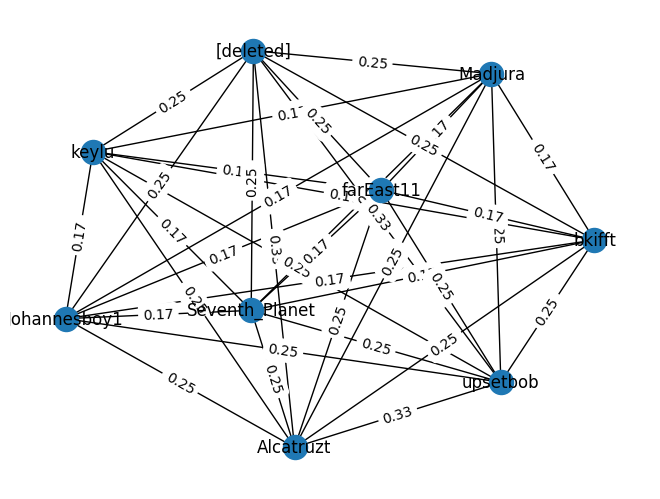

In [ ]:
pos = nx.spring_layout(G_method1, k=1)  # For better example looking
nx.draw(G_method1, pos, with_labels=True)
labels = {e: G_method1.edges[e]['edgeweight_method1'] for e in G_method1.edges}
nx.draw_networkx_edge_labels(G_method1, pos, edge_labels=labels)
plt.show()

In [ ]:
print(G_method1.number_of_nodes())
print(G_method1.number_of_edges()) #edges same as number of rows
print(np.mean([d for _, d in G_method1.degree()])) #average degree of nodes

9
36
8.0


In [ ]:
pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
from node2vec import Node2Vec as n2v

In [ ]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb = n2v(G_method1,dimensions=128)

mdl = g_emb.fit(
    vector_size = 128,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 340.82it/s]


In [ ]:
comment_id = 'keylu'
for s in mdl.wv.most_similar(comment_id, topn = 10):
    print(s)

('Seventh_Planet', 0.9983378052711487)
('Johannesboy1', 0.9982245564460754)
('upsetbob', 0.9982043504714966)
('Madjura', 0.9981406927108765)
('[deleted]', 0.9980746507644653)
('bkifft', 0.9979934096336365)
('farEast11', 0.9978641271591187)
('Alcatruzt', 0.9975917339324951)


---
Generate Graph for 1 submission using Method 2a
---


.

In [ ]:
data_method2a = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','edgeweight_method2a'])
print(data_method2a)

Empty DataFrame
Columns: [subreddit_id, submission_id, from_user, to_user, edgeweight_method2a]
Index: []


In [ ]:
def method2a_function(subreddit_id, subreddit_data):
  data_method2a = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','edgeweight_method2a'])
  #print(data_method2a)

  #obtain the link_id's of all submission in the subreddit
  submissions_list = subreddit_data['link_id'].unique()
  #obtain the names of all user's in the subreddit
  #author_list = subreddit_data['author'].unique()
  #print(author_list[0])
  #print(author_list[1])

  print("Consider subreddit with ID: ",subreddit_id)
  print("total number of submission: ",len(submissions_list))
  print("total number of comments in entire subreddit: ",len(subreddit_data['id'].unique()))
  counter = 0
  ignore_comments_counter = 0

  #iterate across all submissions
  for i in submissions_list:
    print('\n***********************')
    counter += 1
    curr_link_id = i
    print("consider submission with link_id = "+str(curr_link_id)+ " ("+str(counter)+"/"+str(len(submissions_list))+")")

    #obtain all comments made on this submission from the subreddit
    submission_comments = subreddit_data.loc[subreddit_data['link_id'] == curr_link_id]
    #print(submission_comments.head(3))

    #obtain the names of all user's in the subsmission
    author_list = submission_comments['author'].unique()
    print("total number of authors: ",len(author_list))

    #number of comments on the subreddit
    tot_comments = len(submission_comments)
    print("total number of comments in this submission = ", tot_comments)
    j = 0

    #iterate across the current submission
    for index, row in submission_comments.iterrows():
      j += 1
      #print('comment '+str(j)+" ---------------")

      curr_author = row['author']
      curr_parent_comment_id = row['parent_id'][3:] #noticed that the parent id is nothing but the comment id preceded by 3 characters
      #print(curr_parent_comment_id)

      #identify if a comment is a primary comment
      primary_comment_flag = 0
      if row['parent_id'] == row['link_id']: #it is a primary comment
        #print("primary comment")
        primary_comment_flag = 1

      #rule out any comment that does not have a valid parent in the submission
      #(the parent id of a given comment should be either (i) the link id itslef for a primary comment
      # or
      # the id of another comment in the submission)
      if(len(submission_comments[submission_comments['id'] == curr_parent_comment_id]['author']) == 0): #the parent comment could not be found
        #print(primary_comment_flag)
        #if (primary_comment_flag == 1):
          #print('this comment is a reply to the submission and hence will not have an edge')
        #else:
          #print('this comment was made as a reply to another comment which cannot be found in the data')
        #print('there')
        ignore_comments_counter += 1
        continue

      primary_comment_flag = 0
      #print('Found a valid parent comment in the submission')
      curr_parent = submission_comments[submission_comments['id'] == curr_parent_comment_id]['author'].values[0]
      #print('The parent comment was made by author: '+str(curr_parent))
      curr_comment_id = row['id']

      all_replies_to_parent_df = submission_comments[(submission_comments["parent_id"] == row['parent_id'])]
      if len(all_replies_to_parent_df) == 0:
        #print('reached here 1')
        ignore_comments_counter += 1
        continue
      curr_author_all_replies_to_parent_df = all_replies_to_parent_df[(all_replies_to_parent_df["author"] == curr_author)]
      if len(curr_author_all_replies_to_parent_df) == 0:
        #print('reached here 2')
        ignore_comments_counter += 1
        continue
      else:
        #print("edge weight for this comment: "+str(len(curr_author_all_replies_to_parent_df))+"/"+str(len(all_replies_to_parent_df)))
        #weighted_interaction_between_curr_and_curr_parent = float("{:.2f}".format((len(curr_author_all_replies_to_parent_df)/len(all_replies_to_parent_df))))
        weighted_interaction_between_curr_and_curr_parent = (len(curr_author_all_replies_to_parent_df)/len(all_replies_to_parent_df))
        #add the row to the dataframe
        if len(data_method2a[(data_method2a['from_user'] == curr_author) & (data_method2a['to_user'] == curr_parent) & (data_method2a['submission_id'] == curr_link_id)].values) > 0: #there exists a row with the curr_aithor to curr_parent in the same submission already
          ignore_comments_counter += 1
          continue
        else:
          data_method2a.loc[len(data_method2a.index)] = [subreddit_id, curr_link_id, curr_author, curr_parent, weighted_interaction_between_curr_and_curr_parent]
          #print('length of submission data frame: '+str(len(data_method2a)))

    #data_method2a.append(data_method2a_local,ignore_index=True)
    #print(data_method2a_local)
    #print('appended, new length of data frame: '+str(len(data_method2a)))
  print('total number of comments ignored: ' +str(ignore_comments_counter))
  return data_method2a


data_method2a = method2a_function('t5_22i0',data_subreddit_t5_22i0)


Consider subreddit with ID:  t5_22i0
total number of submission:  253
total number of comments in entire subreddit:  6142

***********************
consider submission with link_id = t3_5lc6zb (1/253)
total number of authors:  55
total number of comments in this submission =  70

***********************
consider submission with link_id = t3_5lca7i (2/253)
total number of authors:  36
total number of comments in this submission =  38

***********************
consider submission with link_id = t3_5lbr04 (3/253)
total number of authors:  40
total number of comments in this submission =  67

***********************
consider submission with link_id = t3_5lcd9r (4/253)
total number of authors:  68
total number of comments in this submission =  136

***********************
consider submission with link_id = t3_5lcet3 (5/253)
total number of authors:  37
total number of comments in this submission =  77

***********************
consider submission with link_id = t3_5l8vmf (6/253)
total number o

In [ ]:
print(len(data_method2a))
print(data_method2a.head(60)) #it has the same number of rows as the number of comments in the submission

3454
   subreddit_id submission_id             from_user              to_user  \
0       t5_22i0     t3_5lc6zb                CR1986              Dukelix   
1       t5_22i0     t3_5lc6zb         NinjaPizzaCat           seewolfmdk   
2       t5_22i0     t3_5lc6zb                 wzzle       DankRevolution   
3       t5_22i0     t3_5lc6zb                 marvk          Markulatura   
4       t5_22i0     t3_5lc6zb              Aporitis                marvk   
5       t5_22i0     t3_5lc6zb                moakim             Zaphiren   
6       t5_22i0     t3_5lc6zb                St0rmi           coopiecoop   
7       t5_22i0     t3_5lc6zb             TIMSONBOB          Markulatura   
8       t5_22i0     t3_5lc6zb                donz0r          BlueSparkle   
9       t5_22i0     t3_5lc6zb              Vepanion         Daabevuggler   
10      t5_22i0     t3_5lc6zb           BlueSparkle               donz0r   
11      t5_22i0     t3_5lc6zb          Ausrufepunkt                marvk   
12     

note above you can see that there are different submission id's

In [ ]:
data_method2a_final = pd.DataFrame(columns=['from_user','to_user','edgeweight_method2a'])
print(data_method2a_final)

Empty DataFrame
Columns: [from_user, to_user, edgeweight_method2a]
Index: []


In [ ]:
data_method2a_final = data_method2a.groupby(['submission_id','from_user', 'to_user'], as_index=False)['edgeweight_method2a'].mean()

In [ ]:
print(len(data_method2a_final)) #the length 3454 is the same as the length before taking the mean, that means there is no common user pair across submissions
print(data_method2a_final.columns)
print(data_method2a_final.head(140))

3454
Index(['submission_id', 'from_user', 'to_user', 'edgeweight_method2a'], dtype='object')
    submission_id     from_user            to_user  edgeweight_method2a
0       t3_5kfjik        Kashik            belmawr                  1.0
1       t3_5kfjik       belmawr             Kashik                  1.0
2       t3_5kxw3h  Ausrufepunkt  GlitzerFlitzerFee                  1.0
3       t3_5l2mto   SachenGibts        monyistbitu                  1.0
4       t3_5l4osw     [deleted]            harzach                  1.0
..            ...           ...                ...                  ...
135     t3_5lc6zb    coopiecoop            Bolltan                  1.0
136     t3_5lc6zb        donz0r        BlueSparkle                  1.0
137     t3_5lc6zb         marvk        Markulatura                  0.5
138     t3_5lc6zb        moakim           Zaphiren                  1.0
139     t3_5lc6zb   violetjoker    pointlessly_mad                  1.0

[140 rows x 4 columns]


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
G_method2a = nx.from_pandas_edgelist(data_method2a_final, "from_user", "to_user", edge_attr="edgeweight_method2a", create_using=nx.DiGraph()) #weight for graph not set

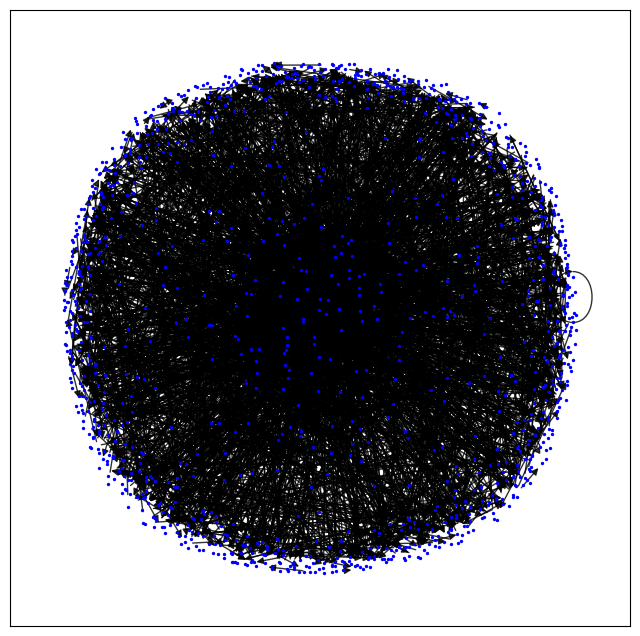

In [ ]:
from matplotlib.pyplot import text
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_method2a, k=0.61)  # For better example looking
d = dict(G_method2a.degree)
labels = {e: G_method2a.edges[e]['edgeweight_method2a'] for e in G_method2a.edges}
#nx.draw(G_method2a, pos,with_labels=True)
#nx.draw(G_method2a, pos)
nx.draw_networkx_edges(G_method2a, pos, alpha=0.8)
nx.draw_networkx_nodes(G_method2a, pos, node_size=2, node_color="b")
#nx.draw_networkx_edge_labels(G_method2a, pos, edge_labels=labels, font_size = 5)
#nx.draw_networkx_labels(G_method2a, pos, labels=labels, font_size = 5)

plt.show()

In [ ]:
print(G_method2a.number_of_nodes())
print(G_method2a.number_of_edges()) #edges same as number of rows
print(np.mean([d for _, d in G_method2a.degree()])) #average degree of nodes
print(G_method2a.size(weight='edgeweight_method2a'))

1180
3289
5.574576271186441
2238.1499999999896


In [ ]:
pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from node2vec import Node2Vec as n2v

In [ ]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb = n2v(G_method2a,dimensions=128)

mdl2 = g_emb.fit(
    vector_size = 128,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/1180 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]


In [ ]:
comment_id = 'Madjura'
for s in mdl2.wv.most_similar(comment_id, topn = 10):
    print(s)

('kairho', 0.9309343695640564)
('ausstieglinks', 0.9250118732452393)
('Guy_A', 0.9174298048019409)
('Vlishtikir', 0.9092766642570496)
('apocom', 0.9032651782035828)
('Domowoi', 0.8897899985313416)
('itsallabigshow', 0.8684737086296082)
('slacksabbath', 0.8576847910881042)
('mimomusic', 0.8549634218215942)
('overjoony', 0.8546503782272339)


---
Generate Graph for 1 subreddit using Method 2b
---


.

In [ ]:
data_method2b = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','num', 'denom'])
print(data_method2b)

Empty DataFrame
Columns: [subreddit_id, submission_id, from_user, to_user, num, denom]
Index: []


In [ ]:
def method2b_function(subreddit_id, subreddit_data):
  submissions_list = subreddit_data['link_id'].unique()

  print("Consider subreddit with ID: ",subreddit_id)
  print("total number of submission: ",len(submissions_list))
  counter = 0
  ignore_comments_counter = 0

  #number of comments on the subreddit
  tot_comments = len(subreddit_data)
  print("total number of comments in this submission = ", tot_comments)

  #iterate across the current submission
  for index, row in subreddit_data.iterrows():
      curr_link_id = row['link_id']
      curr_author = row['author']
      curr_parent_comment_id = row['parent_id'][3:] #noticed that the parent id is nothing but the comment id preceded by 3 characters

      if(len(subreddit_data[subreddit_data['id'] == curr_parent_comment_id]['author']) == 0): #the parent comment could not be found
        ignore_comments_counter += 1
        continue

      #print('Found a valid parent comment in the submission')
      curr_parent = subreddit_data[subreddit_data['id'] == curr_parent_comment_id]['author'].values[0]

      all_replies_to_parent_df = subreddit_data[(subreddit_data["parent_id"] == row['parent_id'])]
      if len(all_replies_to_parent_df) == 0:
        ignore_comments_counter += 1
        continue
      curr_author_all_replies_to_parent_df = all_replies_to_parent_df[(all_replies_to_parent_df["author"] == curr_author)]
      if len(curr_author_all_replies_to_parent_df) == 0:
        ignore_comments_counter += 1
        continue
      else:
        if len(data_method2b[(data_method2b['from_user'] == curr_author)&(data_method2b['to_user'] == curr_parent)].values) > 0: #there exists a row with the curr_author to curr_parent in the same submission already
          ignore_comments_counter += 1
          continue
        else:
          data_method2b.loc[len(data_method2b.index)] = [subreddit_id, curr_link_id, curr_author, curr_parent,len(curr_author_all_replies_to_parent_df), len(all_replies_to_parent_df) ]

  print('total number of comments ignored: ' +str(ignore_comments_counter))
  return data_method2b

data_method2b = method2b_function('t5_22i0',data_subreddit_t5_22i0)


Consider subreddit with ID:  t5_22i0
total number of submission:  253
total number of comments in this submission =  6142
total number of comments ignored: 2853


In [ ]:
print(len(data_method2b))
print(data_method2b)

3289
     subreddit_id submission_id            from_user       to_user  num  denom
0         t5_22i0     t3_5lbr04         SpaceHippoDE   oldandgreat    1      1
1         t5_22i0     t3_5lcd9r   PM_ME_YOUR_TENDIES  SpaceHippoDE    1      1
2         t5_22i0     t3_5lcd9r         omfgwallhax2      arteoncc    1      3
3         t5_22i0     t3_5lcd9r  TweetsInCommentsBot  omfgwallhax2    1      3
4         t5_22i0     t3_5lca7i         Johanneskodo     swabianne    1      1
...           ...           ...                  ...           ...  ...    ...
3284      t5_22i0     t3_5llezm             Microham      guesswh0    1      1
3285      t5_22i0     t3_5lnfrl               Nass44       Jan_Hus    1      1
3286      t5_22i0     t3_5lnze2             Cr34p_v2    Koh-I-Noor    1      1
3287      t5_22i0     t3_5lmdte            ruincreep      TuxGamer    1      1
3288      t5_22i0     t3_5len7w              NightZT         _Lugh    1      1

[3289 rows x 6 columns]


In [ ]:
data_method2b_final = pd.DataFrame(columns=['from_user','to_user','num','denom'])
print(data_method2b_final)

Empty DataFrame
Columns: [from_user, to_user, num, denom]
Index: []


In [ ]:
data_method2b_final = data_method2b.groupby(['from_user', 'to_user'], as_index=False).agg({'num':'sum','denom':'sum'})

In [ ]:
print(len(data_method2b_final))
print(data_method2b_final.columns)
print(data_method2b_final.head(140))

3289
Index(['from_user', 'to_user', 'num', 'denom'], dtype='object')
         from_user         to_user  num  denom
0        -Calidro-         niedrig    1      1
1             -KR-          beerde    1      1
2             -to-   boilersuthere    1      3
3    0xKaishakunin     Auswaschbar    1      2
4    0xKaishakunin       EinDenker    1      3
..             ...             ...  ...    ...
135   Ausrufepunkt          Kashik    1      3
136   Ausrufepunkt          Kouzai    1      1
137   Ausrufepunkt        Le_Cooke    1      2
138   Ausrufepunkt       LittleLui    1      1
139   Ausrufepunkt  MatzedieFratze    1      1

[140 rows x 4 columns]


In [ ]:
data_method2b_final['edgeweight_method2b'] = data_method2b_final['num']/data_method2b_final['denom']

In [ ]:
data_method2b_final.head()

,from_user,to_user,num,denom,edgeweight_method2b
0,-Calidro-,niedrig,1,1,1.000000
1,-KR-,beerde,1,1,1.000000
2,-to-,boilersuthere,1,3,0.333333
3,0xKaishakunin,Auswaschbar,1,2,0.500000
4,0xKaishakunin,EinDenker,1,3,0.333333


In [ ]:
G_method2b = nx.from_pandas_edgelist(data_method2b_final, "from_user", "to_user", edge_attr="edgeweight_method2b", create_using=nx.DiGraph()) #weight for graph not set

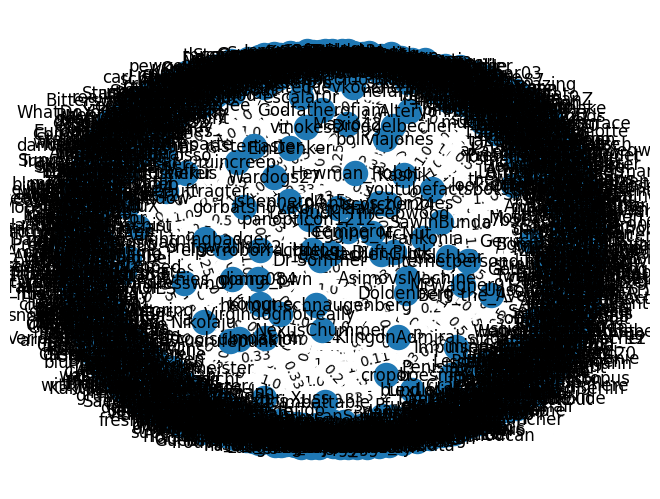

In [ ]:
'''
pos1 = nx.spring_layout(G_method2b, k=1)  # For better example looking
nx.draw(G_method2b, pos1, with_labels=True)
labels1 = {e: G_method2b.edges[e]['edgeweight_method2b'] for e in G_method2b.edges}
nx.draw_networkx_edge_labels(G_method2b, pos1, edge_labels=labels)
plt.show()
'''
pos1 = nx.spring_layout(G_method2b, k=1)  # For better example looking
nx.draw(G_method2b, pos1, with_labels=True)
labels1 = {e: G_method2b.edges[e]['edgeweight_method2b'] for e in G_method2b.edges}
nx.draw_networkx_edge_labels(G_method2b, pos1, edge_labels=labels)
plt.show()

In [ ]:
print(G_method2b.number_of_nodes()) #no.of nodes
print(G_method2b.number_of_edges()) #edges same as number of rows
print(np.mean([d for _, d in G_method2b.degree()])) #average degree of nodes
print(G_method2b.size(weight='edgeweight_method2b'))

1180
3289
5.574576271186441
2242.3373015873003


In [ ]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb2b = n2v(G_method2b,dimensions=128)

mdl2b = g_emb2b.fit(
    vector_size = 128,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/1180 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  9.79it/s]


In [ ]:
comment_id = 'Madjura'
for s in mdl2b.wv.most_similar(comment_id, topn = 10):
    print(s)

('Guy_A', 0.9212992191314697)
('apocom', 0.917194664478302)
('overjoony', 0.8986978530883789)
('ozontm', 0.8903797268867493)
('Vlishtikir', 0.8886982798576355)
('Domowoi', 0.8837333917617798)
('verifiedbyme', 0.8804423213005066)
('throwaway24234', 0.8700554966926575)
('kairho', 0.8648024201393127)
('Aunvilgod', 0.8647739887237549)


---
check if both the graphs from method 2a and 2b are identical
---

.

In [ ]:
import networkx.algorithms.isomorphism as iso

In [ ]:
nx.is_isomorphic(G_method2a, G_method2b)

KeyboardInterrupt: ignored

In [ ]:
em = iso.categorical_edge_match('edgeweight_method2a', 'edgeweight_method2b')
nx.is_isomorphic(G_method2a, G_method2b, edge_match=em)

False

In [ ]:
nx.is_isomorphic(G_method2a, G_method2b, edge_match=lambda x, y: x==y)

False

check if two dataframes are equal

In [ ]:
data_method2b_final.equals(data_method2a_final)

False

In [ ]:
count_mismatch = 0
for ind1, row1 in data_method2a_final.iterrows():
  for ind2, row2 in data_method2b_final.iterrows():
    if row1['from_user'] == row2['from_user']:
     if row1['to_user'] == row2['to_user']:
      if row1['edgeweight_method2a'] != row2['edgeweight_method2b']:
        print(row1['from_user'])
        print(row1['to_user'])
        print(row1['edgeweight_method2a'])
        print(row2['from_user'])
        print(row2['to_user'])
        print(row2['edgeweight_method2b'])
        count_mismatch += 1
print(count_mismatch) #114 different weights found

majambela
[deleted]
1.0
majambela
[deleted]
0.5
[deleted]
thewindinthewillows
1.0
[deleted]
thewindinthewillows
0.3333333333333333
TweetsInCommentsBot
omfgwallhax2
0.25
TweetsInCommentsBot
omfgwallhax2
0.3333333333333333
[deleted]
omfgwallhax2
0.25
[deleted]
omfgwallhax2
0.3333333333333333
[deleted]
Ausrufepunkt
0.3333333333333333
[deleted]
Ausrufepunkt
0.4
[deleted]
[deleted]
0.4
[deleted]
[deleted]
0.25
[deleted]
AlL_RaND0m
0.5
[deleted]
AlL_RaND0m
1.0
[deleted]
[deleted]
1.0
[deleted]
[deleted]
0.25
[deleted]
[deleted]
1.0
[deleted]
[deleted]
0.25
[deleted]
[deleted]
1.0
[deleted]
[deleted]
0.25
[deleted]
[deleted]
0.2
[deleted]
[deleted]
0.25
Despair1
[deleted]
1.0
Despair1
[deleted]
0.5
[deleted]
vinokess
0.75
[deleted]
vinokess
0.5
[deleted]
[deleted]
0.5
[deleted]
[deleted]
0.25
vinokess
[deleted]
1.0
vinokess
[deleted]
0.5
[deleted]
omfgwallhax2
0.5
[deleted]
omfgwallhax2
0.3333333333333333
Ausrufepunkt
Virgindognotreally
0.07142857142857142
Ausrufepunkt
Virgindognotreally
1.0


114 edge weights were different

In [ ]:
print(len(data_method2a_final))
print(len(data_method2b_final))

3454
3289
